<img src="../images/Peoplelogy-Logo.png" style="height: 100px;" align=left> 
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Project: Predicting Boston Housing Prices

---

<img src="../images/forsale.avif">

---

### Description
This dataset is sourced from the **UCI Machine Learning Repository** and concerns housing values in the suburbs of Boston.

---

### Content
- **Number of Instances**: 506

---

### Attribute Information

| **Feature**  | **Description**                                                                                 |
|--------------|-------------------------------------------------------------------------------------------------|
| `CRIM`       | Per capita crime rate by town.                                                                  |
| `ZN`         | Proportion of residential land zoned for lots over 25,000 sq.ft.                                |
| `INDUS`      | Proportion of non-retail business acres per town.                                               |
| `CHAS`       | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).                          |
| `NOX`        | Nitric oxides concentration (parts per 10 million).                                             |
| `RM`         | Average number of rooms per dwelling.                                                          |
| `AGE`        | Proportion of owner-occupied units built prior to 1940.                                         |
| `DIS`        | Weighted distances to five Boston employment centres.                                           |
| `RAD`        | Index of accessibility to radial highways.                                                     |
| `TAX`        | Full-value property-tax rate per 10,000.                                                       |
| `PTRATIO`    | Pupil-teacher ratio by town.                                                                    |
| `B`          | \( 1000(Bk - 0.63)^2 \), where \( Bk \) is the proportion of blacks by town.                    |
| `LSTAT`      | Percentage of the population with lower socioeconomic status.                                   |
| `MEDV`       | Median value of owner-occupied homes in $1000's (Target variable).                              |

---

### Usage
This dataset is often used for:
1. Regression problems to predict `MEDV` (housing price).
2. Exploratory data analysis and feature engineering practice.

## Instructions
You will build a linear regression model to predict housing prices using the Boston Housing Prices dataset. Complete each task step-by-step as outlined below.

---

## Expected Learning Outcomes
- Normalize data using `StandardScaler`.
- Perform a train-test split.
- Build a machine learning pipeline.
- Evaluate a regression model using MSE and \( R^2 \).


### Step 1: Load and Explore the Dataset
1. **Load the Boston Housing Prices dataset using `../data/housing.csv`.** 
   - Display the first 5 rows of the dataset as a pandas DataFrame.
   - Assign the features to \( X \) and the target variable (`MEDV`) to \( y \).
   
   **Hint**:
   - Use `pd.DataFrame` to convert the dataset into a DataFrame.
   - The target variable can be accessed via `df.MEDV`.

---


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets

#always start with logistic regressions
#layer other models
#tweaking the parameters

In [2]:
# Load the dataset
file_path = '../data/housing.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
conf = confusion_metrics(y_test,y_pred)

In [7]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [13]:
# default is 75% / 25% train-test split
#randome state so all of us will get the same split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [14]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03
205,0.13642,0.0,10.59,0,0.489,5.891,22.3,3.9454,4,277,18.6,396.90,10.87
79,0.08387,0.0,12.83,0,0.437,5.874,36.6,4.5026,5,398,18.7,396.06,9.10


In [15]:
y_train.head()

41     26.6
264    36.5
193    31.1
205    22.6
79     20.3
Name: MEDV, dtype: float64


### Step 2: Normalize the Features
2. **Use `StandardScaler` to normalize the features in \( X \).** 
   - Apply normalization **only after splitting** the data into training and testing sets.
   
   **Hint**:
   - First, perform train-test split using `train_test_split`.
   - Fit the scaler on the training data only and transform both training and testing data.

---


In [18]:
## Step 2
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
Xtrain_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
Xtest_scaled = scaler.transform(X_test)


### Step 3: Split the Data
3. **Split the dataset into training and testing sets with an 80-20 split.**
- Assign the result to variables 
  $ X_{\text{train}}, X_{\text{test}}, y_{\text{train}}, y_{\text{test}} $.

  **Hint**:
  - Use `train_test_split` from `sklearn.model_selection`.

---


In [19]:
# Your Code here
# default is 75% / 25% train-test split
#randome state so all of us will get the same split
from sklearn.model_selection import train_test_split
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Display the results
print("Training Features:\n", X_train)
print("\nTesting Features:\n", X_test)
print("\nTraining Labels:\n", y_train)
print("\nTesting Labels:\n", y_test)

Training Features:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS  RAD  TAX  \
355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334   
460  4.81213   0.0  18.10     0  0.713  6.701  90.0   2.5975   24  666   
120  0.06899   0.0  25.65     0  0.581  5.870  69.7   2.2577    2  188   
346  0.06162   0.0   4.39     0  0.442  5.898  52.3   8.0136    3  352   
457  8.20058   0.0  18.10     0  0.713  5.936  80.3   2.7792   24  666   
..       ...   ...    ...   ...    ...    ...   ...      ...  ...  ...   
67   0.05789  12.5   6.07     0  0.409  5.878  21.4   6.4980    4  345   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7   2.2875    1  273   
25   0.84054   0.0   8.14     0  0.538  5.599  85.7   4.4546    4  307   
196  0.04011  80.0   1.52     0  0.404  7.287  34.1   7.3090    2  329   
175  0.06664   0.0   4.05     0  0.510  6.546  33.1   3.1323    5  296   

     PTRATIO       B  LSTAT  
355     22.0  376.04   5.57  
460     20.2  255.23  16.42  
1


### Step 4: Create a Pipeline
4. **Build a pipeline that includes:**
   - `StandardScaler` for normalization.
   - `LinearRegression` for fitting the model.
   - Fit the pipeline to the training data.
   
   **Hint**:
   - Use `Pipeline` from `sklearn.pipeline`.

---


In [22]:
# your Code Here
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    StandardScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [24]:
# Fit the pipeline to the training data
poly_pipeline.fit(X_train, y_train)

# Display the pipeline
print(poly_pipeline)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])


In [69]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (404, 13)
y_train.shape (404,)
X_test.shape (102, 13)
y_test.shape (102,)



### Step 5: Evaluate the Model
5. **Use the pipeline to make predictions on the test data.**
   - Evaluate the model using:
     - Mean Squared Error (MSE).
     - R-squared (\( R^2 \)).
   
   **Hint**:
   - Use `mean_squared_error` and `r2_score` from `sklearn.metrics`.

---



In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Your Code Here
model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: 23.554245467591056
Slope:     [-1.24649091e-01  3.04735052e-02  2.17990089e-02  2.79225761e+00
 -1.52135247e+01  5.27249266e+00 -1.10577742e-02 -1.27320872e+00
  2.65804711e-01 -1.15043029e-02 -9.19571148e-01  1.01624292e-02
 -3.89712044e-01]


In [64]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R2 Score for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error and R² Score for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Mean Squared Error: {:.3f}".format(mse_train))
print("Training R2 Score: {:.3f}".format(r2_train))
print("Testing Mean Squared Error: {:.3f}".format(mse_test))
print("Testing R2 Score: {:.3f}".format(r2_test))

Training Mean Squared Error: 19.639
Training R2 Score: 0.770
Testing Mean Squared Error: 34.056
Testing R2 Score: 0.579


### Step 6: Visualize the Results (Optional)
6. **Create a scatter plot comparing the predicted prices vs actual prices for the test data.**
   
   **Hint**:
   - Use `plt.scatter` from `matplotlib.pyplot`.

---


In [78]:
import numpy as np

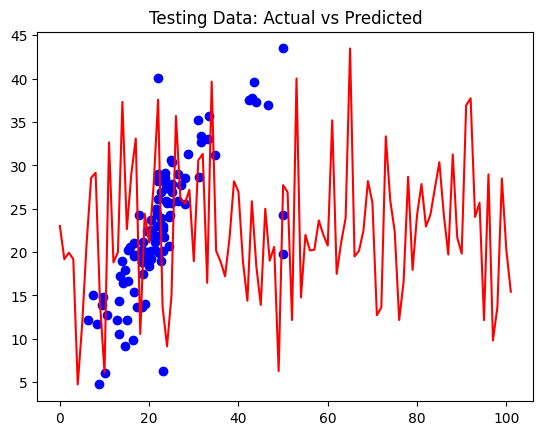

In [87]:
# Plotting Actual vs Predicted for Testing Data
plt.scatter(y_test,y_test_pred, color='blue', label='Actual Values')
plt.plot(y_test_pred, c='red')
plt.title('Testing Data: Actual vs Predicted')

# Show the plots
plt.show()

In [52]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
